In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# 1. Préparation des données

https://thedatafrog.com/fr/articles/handwritten-digit-recognition-scikit-learn/

## 1.1  Téléchargement de données

In [2]:
data = fetch_openml(name='mnist_784', version=1)

## 1.2  Information sur les données

### 1.2.1

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 1.2.2

In [4]:
# Taille des données:
print(data.data.shape)

(70000, 784)


Le dataset est composé de 784 features. Elles ont une taille de 70 000. 

In [5]:
# Stockages des données dans une variable X:
X = data.data
X.shape

(70000, 784)

In [6]:
# La taille des labels :
print(data.target.shape)

(70000,)


In [7]:
# Stockage des labels dans une variable y:
y = data.target
y.shape

(70000,)

In [8]:
#Affichage des différentes classes de la base de donnée :
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [9]:
#Description détaillé de la base de donnée :
print(data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### 1.2.3

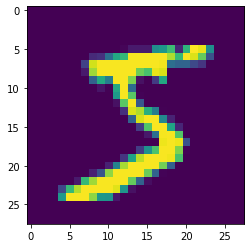

In [10]:
import matplotlib.pyplot as plt

img_1 = X[0]
img_1 = img_1.reshape(28,28)
plt.imshow(img_1)

In [11]:
instance_1 = y[0]
print(instance_1)

5


### 1.2.4

In [12]:
#Type des labels:
type(instance_1)

str

Les labels sont des chaînes de caractère

### 1.2.5

In [13]:
# Conversion des str en int dans y:
y = y.astype(np.int)

y.dtype

dtype('int32')

## 1.3 Répartition des données

In [14]:
X_app = X[:60000,:]
X_test = X[60000:,:]

print(X_app.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [15]:
y_app = y[:60000]
y_test = y[60000:]

print(y_app.shape)
print(y_test.shape)

(60000,)
(10000,)


# 2. Apprentissage d’un classifieur binaire

## 2.1 Apprentissage des données

### 2.1.1

In [16]:
y_app_5 = y_app==5

y_test_5 = y_test==5

### 2.1.2

In [17]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log')
clf.fit(X_app, y_app_5)

SGDClassifier(loss='log')

In [18]:
#y_test_5 = y_test_5.reshape(y_test_5.shape[0], 1)
#y_test_5.shape

In [19]:
prediction = clf.predict(X_test)

print(f"Valeur rééle de y_test[0] : {y_test[0]}")
print(f"La valeur de y_test_5[0] sera donc {y_test_5[0]}")
print(f"Notre prédiction nous donne : {prediction[0]}")

Valeur rééle de y_test[0] : 7
La valeur de y_test_5[0] sera donc False
Notre prédiction nous donne : False


Notre prédiction est donc juste

## 2.2  Évaluation du modèle d’apprentissage sur les données d’apprentissage

### 2.2.1 Taux de classification

#### 2.2.1.1

In [20]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(clf, X_app, y_app_5, cv=3, scoring='accuracy')
cvs

array([0.95235, 0.9631 , 0.9539 ])

In [21]:
cvs.mean().round(3)

0.956

#### 2.2.1.2 et 2.2.1.3

Création d'un classifieur

In [22]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros(X.shape[0], dtype='bool')

#### 2.2.1.4

In [23]:
classifier = Never5Classifier()

#### 2.2.1.5

In [24]:
classifier.fit(X_app, y_app_5)
prediction2 = classifier.predict(X_test)

In [25]:
cvs2 = cross_val_score(classifier, X_app, y_app_5, cv=3, scoring='accuracy')

In [26]:
print(cvs2)
print(cvs2.mean().round(3))

[0.91125 0.90855 0.90915]
0.91


### 2.2.2 Matrice de confusion

#### 2.2.2.1

In [27]:
from sklearn.model_selection import cross_val_predict

cvp = cross_val_predict(clf, X_app, y_app_5, cv=3)

#### 2.2.2.2

In [28]:
from sklearn.metrics import confusion_matrix

matrice_confusion = confusion_matrix(y_app_5, cvp)
matrice_confusion

array([[53645,   934],
       [ 1314,  4107]], dtype=int64)

Sur 53 645 images preditent comme "non des 5", 1314 sont des 5.

Sur 4 107 images préditent comme "5", 934 ne sont pas des 5.

### 2.2.3  Précision et rappel:

In [29]:
TN = matrice_confusion[0,0]
TP = matrice_confusion[1,1]
FN = matrice_confusion[1,0]
FP = matrice_confusion[0,1]
print(TP,TN,FP,FN)

4107 53645 934 1314


**Precision :**

In [30]:
precision = TP / float(TP + FP)
print(f"Précision : {precision}")

Précision : 0.814719301725848


**Rappel :**

In [31]:
rappel = TP / float(TP + FN)
print(f"Rappel : {rappel}")

Rappel : 0.7576092971776425


**F1 :**

In [32]:
f1_score = 2 * (precision * rappel) / (precision + rappel)
print(f"F1 : {f1_score}")

F1 : 0.7851271267444084


**Score des différentes instances de la base d'apprentissage :**

In [33]:
cvp2 = cross_val_predict(clf, X_app, y_app_5, cv=3, method='decision_function')

In [35]:
print(cvp2)

[  5180.25101737 -16028.63577913 -21620.72145304 ...   9643.03901392
 -15450.04950456 -18208.29221332]


**Calcul de la précision et le rappel de chaque instances :**

In [36]:
from sklearn.metrics import precision_recall_curve

precision_rappel = precision_recall_curve(y_app_5, cvp2)
print(f"Précision : {precision_rappel[0]}")
print(f"Rappel : {precision_rappel[1]}")

Précision : [0.09039218 0.09037702 0.09037852 ... 1.         1.         1.        ]
Rappel : [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]


**Courbe Precision/Rappel :**

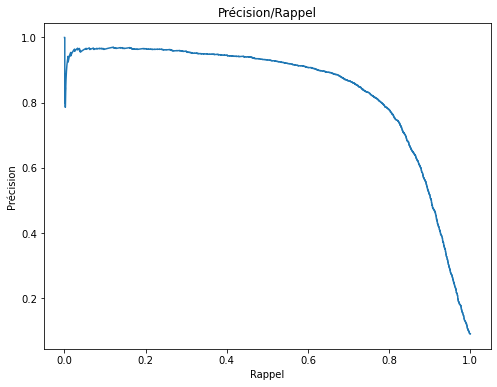

In [37]:
plt.figure(figsize=(8,6))
plt.title('Précision/Rappel')
plt.plot(precision_rappel[1], precision_rappel[0])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.show()

Nous pouvons remarquer que plus le modèle sélectionne des éléments pertients (les chiffres qui sont des 5), plus le modèle à du mal a différencier un éléments pertinents d'un élément non pertinents (si le chiffre est un 5 ou non) 

### 2.2.4  Courbe ROC :

In [38]:
from sklearn.metrics import roc_curve

ROC = roc_curve(y_app_5, cvp2)

tfp = ROC[0]
tvp = ROC[1]
seuil = ROC[2]

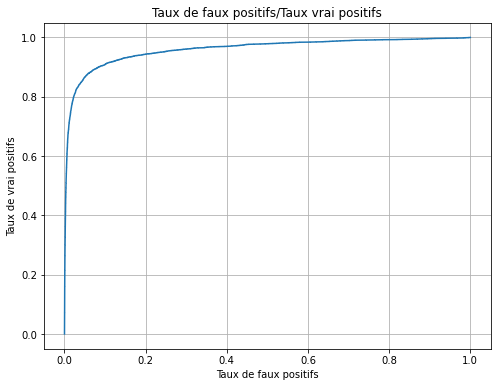

In [39]:
plt.figure(figsize=(8,6))
plt.title('Taux de faux positifs/Taux vrai positifs')
plt.plot(tfp, tvp)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.grid(True)
plt.show()

Le taux de faux positifs augmente lorsque notre taux de vrai positifs tend vers 1.

In [40]:
from sklearn.metrics import roc_auc_score

ROC_score = roc_auc_score(y_app_5, cvp2)
ROC_score

0.9596688656288227

# 3. Apprentissage d’un classifieur multi-classes

## 3.1 Apprentissage des données : 

**Modèle en se basant sur toutesles instances (images) d’apprentissage :**

In [41]:
clf_final = SGDClassifier(loss='log')
clf_final.fit(X_app, y_app)

SGDClassifier(loss='log')

**Prédiction de la classe de la première instance de la base de données :**

In [43]:
predic = clf_final.predict(X_test)

In [45]:
print(f"Classe réélle de la première instance des données de test : {y_test[0]}")
print(f"Classe prédite : {predic[0]}")

Classe réélle de la première instance des données de test : 7
Classe prédite : 7


Notre prédiction est juste

**Les 10 scores de décision utilisés par la méthode SGD**

In [51]:
decision_score = clf_final.decision_function(X_test)

print("Les 10 scores de decision utilisés par la méthode SGD pour la première instance sont :")
for i, score in enumerate(decision_score[0]):
    print(f"Score {i} : {score}")

Les 10 scores de decision utilisés par la méthode SGD pour la première instance sont :
Score 0 : -34777.79830779828
Score 1 : -32338.522519329348
Score 2 : -9951.464975586776
Score 3 : -1392.9560878189218
Score 4 : -14952.060605583873
Score 5 : -7702.345193296217
Score 6 : -40317.98405061006
Score 7 : 5841.702692780053
Score 8 : -6358.053170169216
Score 9 : -7423.555730599755


**Les différentes classes utilisées par le classifieur**

In [60]:
clf_final.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 3.2  Évaluation du modèle d’apprentissage sur les données d’apprentissage

### 3.2.1 Taux de classification

**Validation croisée sur les données d'apprentissage :**

In [61]:
cvs_final = cross_val_score(clf_final, X_app, y_app, cv=3, scoring='accuracy')
print(f"Taux de classification (accuracy) de chaque fold :")
for i, fold in enumerate(cvs_final, 1):
    print(f"Fold {i} : {fold}")

Taux de classification (accuracy) de chaque fold :
Fold 0 : 0.86845
Fold 1 : 0.8767
Fold 2 : 0.8749


In [62]:
print(f"Moyenne des taux de classification : {cvs_final.mean()}")

Moyenne des taux de classification : 0.87335


**Standardisation des données d'apprentissage :**

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_app = scaler.fit_transform(X_app)

2.353219659950383e-18


**Validation croisée sur les données d'apprentissage après standardisation :**

In [66]:
cvs_final_std = cross_val_score(clf_final, X_app, y_app, cv=3, scoring='accuracy')
print(f"Taux de classification (accuracy) de chaque fold :")
for i, fold in enumerate(cvs_final_std, 1):
    print(f"Fold {i} : {fold}")

Taux de classification (accuracy) de chaque fold :
Fold 1 : 0.8995
Fold 2 : 0.89435
Fold 3 : 0.90445


In [67]:
print(f"Moyenne des taux de classification : {cvs_final_std.mean()}")

Moyenne des taux de classification : 0.8994333333333332


Nous pouvons remarquer qu'après standardisation le taux de classification est meilleurs

### 3.2.2 Matrice de confusion :

In [72]:
cvp_final = cross_val_predict(clf_final, X_app, y_app, cv=3)

In [73]:
matrice_confusion_final = confusion_matrix(y_app, cvp_final)
matrice_confusion_final

array([[5569,    0,   22,    6,    8,   45,   36,    6,  230,    1],
       [   0, 6405,   38,   23,    4,   44,    4,    7,  207,   10],
       [  26,   29, 5235,   89,   72,   26,   68,   40,  368,    5],
       [  22,   16,  118, 5229,    2,  206,   26,   40,  401,   71],
       [  10,   14,   46,    9, 5193,   12,   35,   26,  334,  163],
       [  27,   15,   32,  167,   54, 4439,   73,   15,  540,   59],
       [  30,   15,   43,    2,   43,   97, 5548,    5,  134,    1],
       [  19,   10,   52,   27,   48,   12,    3, 5704,  190,  200],
       [  16,   66,   48,   89,    3,  124,   24,   10, 5431,   40],
       [  24,   18,   29,   66,  117,   33,    1,  182,  387, 5092]],
      dtype=int64)

Les résultats sont corrects mis à part pour le chiffre 8 où nous avons beaucoup de faux positifs. En effet, sur 5431 images classés comme étant des 8 :

* 230 sont en réalité des 0
* 207 sont en réalité des 1
* 368 sont en réalité des 2
* 401 sont en réalité des 3
* 334 sont en réalité des 4
* 540 sont en réalité des 5
* 134 sont en réalité des 6
* 190 sont en réalité des 7
* 387 sont en réalité des 9